In [2]:
from PIL import Image
from IPython.display import display
import torch as th

def inverse_normalize(img, mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711)):
    """
    :param img: numpy array. shape (B, C, H, W) or (C, H, W). [-1~1]
    :return: numpy array. shape (height, width, channel). [0~1]
    """
    if len(img.shape) == 4:
        for i in range(3):
            img[:, i,:, :] = ((img[:, i,:,:]) * std[i]) + mean[i]
    elif len(img.shape) == 3:
        for i in range(3):
            img[i,:, :] = ((img[i,:,:]) * std[i]) + mean[i]

    return img*255

def show_images(batch: th.Tensor):
    """ Display a batch of images inline. """
    scaled = inverse_normalize(batch, (0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)).round().clamp(0,255).to(th.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    display(Image.fromarray(reshaped.numpy()))

def ret_images(batch: th.Tensor):
    """ Display a batch of images inline. """
    scaled = inverse_normalize(batch, (0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)).round().clamp(0,255).to(th.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    return (Image.fromarray(reshaped.numpy()))

In [35]:
from gita.data.teeth_img import PairedTeethImageData
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader
import torch
import os
from tqdm.auto import tqdm
data = PairedTeethImageData(img_dir='/home/yewon/GITA/dataset/train',
                            istrain=True, 
                            condi_aug_level=0.5,
                            super_res=False,
                            low_res_size=64,
                            )
dataloader = DataLoader(data, batch_size=1, shuffle=True)

0it [00:00, ?it/s]

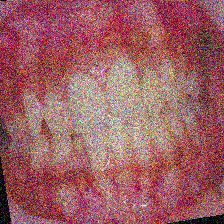

0it [00:00, ?it/s]


In [45]:
for i, (batch, cond) in tqdm(enumerate(dataloader)):
    # print(batch.shape)
    show_images(cond['condi_img'])
    break